$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
<h1 align="left" style="color: #cd7f32;"> HHL algorithm implemetation for solving task 1</h1>

<h2 align="left" style="color: #cd7f32;"> HHL Algorithm</h2>

The HHL Algorithm uses three registers preset to $\ket{0}$ and one additional qubit
- $n_l$ storing store a binary representation of the eigenvalues of A
- $n_b$ storing the vector solution
- $n_a$ storing the auxilary qubits
- One qubit for the rotation an inversion of the eigenvalues

 The algorithm finishes when the last qubit for conditionned rotation is meseared and found in state $\ket{1}$. All the auxillary qubits are set to $\ket{0}$ at the end of the algorithm.

<figure>
    <img src="Images/hhlcircuit.png" style="width:50%" align="left">
    </br>
    <figcaption align="bottom"></.a></figcaption>
</figure>

HHL Algorithm circuit - source: <a href="https://qiskit.org/textbook/ch-applications/hhl_tutorial.html">qiskit</a>

<h2 align="left" style="color: #cd7f32;"> Warmup</h2>

<h3 align="left" style="color: #cd7f32;"> Step 1</h3>
First we try to use the predefined algorithm of HHL on qiskit module

In [1]:
import numpy as np

from qiskit.algorithms.linear_solvers.hhl import HHL
from qiskit.quantum_info import Statevector


T = 6
deltaT=1
x = 2*np.pi*deltaT/T

matrix = np.array([
    [0 , 0  , 1  , x],
    [0 , 0  , -x , 1],
    [1 , -x , 0  , 0],
    [x , 1  , 0  , 0]])

vector = np.array([1,0,0,0])

solution = HHL().solve(matrix, vector)


In [2]:
print('state:')
print(solution.state)
print('State Euclidean norm:', np.round(solution.euclidean_norm,3))

state:
      ┌─────────────┐┌──────┐        ┌─────────┐
q4_0: ┤0            ├┤4     ├────────┤4        ├
      │  circuit-85 ││      │        │         │
q4_1: ┤1            ├┤5     ├────────┤5        ├
      └─────────────┘│      │┌──────┐│         │
q5_0: ───────────────┤0     ├┤3     ├┤0        ├
                     │  QPE ││      ││  QPE_dg │
q5_1: ───────────────┤1     ├┤2     ├┤1        ├
                     │      ││      ││         │
q5_2: ───────────────┤2     ├┤1 1/x ├┤2        ├
                     │      ││      ││         │
q5_3: ───────────────┤3     ├┤0     ├┤3        ├
                     └──────┘│      │└─────────┘
  q6: ───────────────────────┤4     ├───────────
                             └──────┘           
State Euclidean norm: 0.691


<h3 align="left" style="color: #cd7f32;"> Step 2</h3>
Now we get the raw solution vector
</br>
For that, we need to extract the right vector components from the state:
The drawn circuit shows that we should mesure qubits 4 and 5 (representing the solution register)
When the computation ends, all auxilary qubits are reset to $\ket{0}$, the rotation qubit to $\ket{1}$
</br>
The final state has the following form:
$\ket{10000XX}$
</br>
The possible cases are: $\ket{64} = \ket{1000000},\ket{65} = \ket{1000001},\ket{66} = \ket{1000010},\ket{67} = \ket{1000011}$


In [3]:

sv = Statevector(solution.state).data

# Extract the right vector components. binary(qubit 4) = 1000000 corresponds to the index 8 and binary(qubit 5) = 1001 corresponds to the index 9
full_vector = np.array([sv[64], sv[65],sv[66], sv[67]])

print('Raw solution vector :')

print(np.round(full_vector,3))
print('Norm of raw solution: {:.3f}'.format(np.linalg.norm(full_vector)))

Raw solution vector :
[-0.   -0.j -0.   -0.j  0.691+0.j  0.723-0.j]
Norm of raw solution: 1.000


<h3 align="left" style="color: #cd7f32;"> Step 3</h3>

The norm dosen't correspond to the norm of the solution calculated above. We should devide this vector by its norm and then multiply it  by the norm of the solution to get the correct result.

In [4]:
full_vector = np.real(full_vector)
print(full_vector)
full_vector = solution.euclidean_norm*full_vector/np.linalg.norm(full_vector)
print('Solution vector:', np.round(full_vector,3))
print('Norm of the solution: {:.3f}'.format(np.linalg.norm(full_vector)))

[-2.58831132e-15 -5.41032924e-16  6.90621123e-01  7.23216748e-01]
Solution vector: [-0.    -0.     0.477  0.499]
Norm of the solution: 0.691


<h2 align="left" style="color: #cd7f32;"> Comparaison with classical algorithms </h2>

In [5]:
import numpy as np

from qiskit.algorithms.linear_solvers.hhl import HHL
from qiskit.quantum_info import Statevector


T = 6
deltaT=1
x = 2*np.pi*deltaT/T

matrix = np.array([
    [0 , 0  , 1  , x],
    [0 , 0  , -x , 1],
    [1 , -x , 0  , 0],
    [x , 1  , 0  , 0]])

vector = np.array([1,0,0,0])

solution = HHL().solve(matrix, vector)

sv = Statevector(solution.state).data

# Extract the right vector components.1000000 -> 64  ;  1000001 -> 65  ;  1000010 -> 66  ;  1000011 -> 67  ;
full_vector = np.array([sv[64], sv[65],sv[66], sv[67]])

full_vector = np.real(full_vector)
quantum = solution.euclidean_norm*full_vector/np.linalg.norm(full_vector)
print("Norm of the solution : {:.7f}".format(solution.euclidean_norm))
print("Quantum solution     : [{:.3f}\t{:.3f}\t{:.7f}\t{:.7f}]".format(quantum[0],quantum[1],quantum[2],quantum[3]))
classical = np.dot(np.linalg.inv(matrix),vector)
print("Classical solution   : [{:.3f}\t{:.3f}\t{:.7f}\t{:.7f}]".format(classical[0],classical[1],classical[2],classical[3]))

Norm of the solution : 0.6906211
Quantum solution     : [-0.000	-0.000	0.4769575	0.4994688]
Classical solution   : [0.000	0.000	0.4769575	0.4994688]


<div class="alert alert-block alert-success">
HHL algorithm offers similar results to the classical algorithms.
</div>


<h2 align="left" style="color: #cd7f32;"> Solution implementation </h2>

<h3 align="left" style="color: #cd7f32;"> Implementation of the algorithm as python functions</h3>


In [4]:
import numpy as np

from qiskit.algorithms.linear_solvers.hhl import HHL
from qiskit.quantum_info import Statevector

import matplotlib.pyplot as plt



def quantumSolve(matrix, vector):
    """
    This function uses HHL algorothm to compute the solution of the equation Matrix * X = Vector and returns the solution
    Parameters
    - matrix : The matrix r"presenting the linear system
    - vector : The vector representing the second memebr of the equation
    """

    solution = HHL().solve(matrix, vector)
    sv = Statevector(solution.state).data

    # Extract the right vector components.
    # 1000000 -> 64  ;  1000001 -> 65  ;  1000010 -> 66  ;  1000011 -> 67  ;
    full_vector = np.array([sv[64], sv[65],sv[66], sv[67]])
    
    full_vector = np.real(full_vector)
    return solution.euclidean_norm*full_vector/np.linalg.norm(full_vector)

def orbite_matrix(T, deltaT,P):
    """
    This function generates the matrix representing the motion of one satellite and its corresponding quantum state vector given the following parameters:
    - T      : The period
    - deltaT : The time step
    - P      : The intial position: (x0,y0)
    """
    
    x = 2*np.pi*deltaT/T

    matrix = np.array([
        [0 , 0  , 1  , x],
    [0 , 0  , -x , 1],
    [1 , -x , 0  , 0],
    [x , 1  , 0  , 0]])
    vector = np.array([P[0],P[1],0,0])
    vector = vector/np.linalg.norm(vector)
    return matrix, vector

def compute_orbite(T, deltaT, P, tEnd):
    """
    This function computes the orbit of a stellite given the following parameters:
    - T      : The period
    - deltaT : The time step
    - P      : The intial position: (x0,y0)
    - tEnd   : time when simulation ends
    """
    X = [P[0]]
    Y = [P[1]]
    r = np.sqrt(P[0]**2+P[1]**2)
    matrix, vector = orbite_matrix(T, deltaT,P)

    
    print("Step\tOutput vector\n")
    print(0, "\t[{:.3f}\t{:.3f}\t{}\t{}]".format(vector[0],vector[1],int(vector[2]),int(vector[3])))
    t = 0
    while t < tEnd:
        t = t + deltaT
        vector = quantumSolve(matrix, vector)
        # Prepare entery for next iteration
        vector = [vector[2],vector[3],0,0]
        #adding current solution to solution list
        X.append(vector[0]*r)
        Y.append(vector[1]*r)
        print(len(X)-1, "\t[{:.3f}\t{:.3f}\t{}\t{}]".format(vector[0],vector[1],vector[2],vector[3]))
    # Plotting the results
    plt.plot(X, Y, 'ro')
    plt.xlabel('X (Millon Km)')
    plt.ylabel('Y (Millon Km)')
    plt.title('James Webb space telescope')
    plt.axis('equal')
    plt.show()

<h3 align="left" style="color: #cd7f32;">Simulation of James Webb's Orbit</h3>

According to <a href="https://webb.nasa.gov/content/about/orbit.html">NASA</a>, The James Webb Space Telescope Orbit has a 1.5 Milion Km radius. and a period of about 6 months around Earth.
<img src="Images/JamesWebb.jpg" width="100%" align="left">

Step	Output vector

0 	[0.000	1.000	0	0]
1 	[-0.104	0.989	0	0]
2 	[-0.206	0.973	0	0]
3 	[-0.306	0.946	0	0]
4 	[-0.403	0.909	0	0]
5 	[-0.496	0.862	0	0]
6 	[-0.583	0.806	0	0]
7 	[-0.664	0.741	0	0]
8 	[-0.737	0.668	0	0]
9 	[-0.803	0.587	0	0]
10 	[-0.859	0.501	0	0]
11 	[-0.907	0.408	0	0]
12 	[-0.944	0.312	0	0]
13 	[-0.972	0.212	0	0]
14 	[-0.989	0.109	0	0]
15 	[-0.995	0.006	0	0]
16 	[-0.990	-0.098	0	0]
17 	[-0.974	-0.200	0	0]
18 	[-0.948	-0.301	0	0]
19 	[-0.911	-0.398	0	0]
20 	[-0.865	-0.491	0	0]
21 	[-0.809	-0.578	0	0]
22 	[-0.745	-0.659	0	0]
23 	[-0.672	-0.733	0	0]
24 	[-0.592	-0.799	0	0]
25 	[-0.505	-0.857	0	0]
26 	[-0.413	-0.905	0	0]
27 	[-0.317	-0.943	0	0]
28 	[-0.217	-0.971	0	0]
29 	[-0.115	-0.988	0	0]
30 	[-0.011	-0.994	0	0]
31 	[0.092	-0.990	0	0]
32 	[0.195	-0.975	0	0]
33 	[0.295	-0.950	0	0]
34 	[0.393	-0.914	0	0]
35 	[0.486	-0.868	0	0]
36 	[0.574	-0.813	0	0]
37 	[0.655	-0.748	0	0]
38 	[0.729	-0.676	0	0]
39 	[0.796	-0.596	0	0]
40 	[0.854	-0.510	0	0]
41 	[0.902	-0.419	0	0]
42 	[0.941

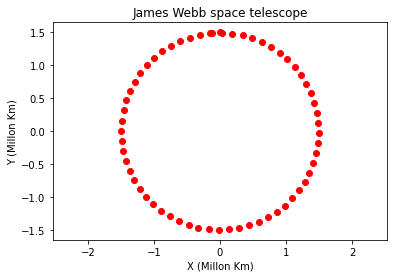

In [5]:
T = 6
deltaT=1E-1
P = [0,1.5]
compute_orbite(T, deltaT, P,T)

<div class="alert alert-block alert-info">
The smaller the time step, the best accurate are the resuts obtained by the algorithm
</div>
